# 1. Introduction
Exploring a dataset from a multinational consultancy firm to analyze and predict employee attrition based on various attributes collected over a certain period.

# 2. Importing Necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


HR_Analytics_emp_attrition.csv

# 3. Load Dataset
Importing our Dataset and setting the Employee Number as the index

In [4]:
df = pd.read_csv("HR_Analytics_emp_attrition.csv")
df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


In [5]:
df.shape

(1480, 38)

In [6]:
df.index

RangeIndex(start=0, stop=1480, step=1)

In [7]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
    print(df.isnull().sum())

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

Drop rows with critical missing values

In [9]:
df = df.dropna(subset=[ 'YearsWithCurrManager'])

Convert categorical columns to category type

In [10]:

categorical_columns = [
    'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
]

df[categorical_columns] = df[categorical_columns].astype('category')

Ensure numerical columns are correct type

In [11]:
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
    'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
    'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Handle outliers in Monthly Income (cap at 99th percentile)

In [12]:
income_cap = df['MonthlyIncome'].quantile(0.99)
df['Monthly Income'] = df['MonthlyIncome'].clip(upper=income_cap)

# 4. Preliminary Data Analysis
Data Dimensions / Data Types / Missing Values

In [13]:
df.duplicated().any()

np.True_

In [14]:
# View duplicated rows
duplicates = df[df.duplicated()]
print(duplicates)



       EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
211   RM1468   27    26-35        No      Travel_Rarely        155   
328   RM1461   29    26-35        No      Travel_Rarely        468   
458   RM1464   31    26-35        No         Non-Travel        325   
655   RM1470   34    26-35        No       TravelRarely        628   
954   RM1463   39    36-45        No      Travel_Rarely        722   
1305  RM1469   49    46-55        No  Travel_Frequently       1023   
1336  RM1462   50    46-55       Yes      Travel_Rarely        410   

                  Department  DistanceFromHome  Education EducationField  ...  \
211   Research & Development                 4          3  Life Sciences  ...   
328   Research & Development                28          4        Medical  ...   
458   Research & Development                 5          3        Medical  ...   
655   Research & Development                 8          3        Medical  ...   
954                    Sales      

In [15]:
# Drop exact duplicate rows
df = df.drop_duplicates()
df.duplicated().any()

np.False_

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1479
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmpID                     1416 non-null   object  
 1   Age                       1416 non-null   int64   
 2   AgeGroup                  1416 non-null   category
 3   Attrition                 1416 non-null   category
 4   BusinessTravel            1416 non-null   category
 5   DailyRate                 1416 non-null   int64   
 6   Department                1416 non-null   category
 7   DistanceFromHome          1416 non-null   int64   
 8   Education                 1416 non-null   int64   
 9   EducationField            1416 non-null   category
 10  EmployeeCount             1416 non-null   int64   
 11  EmployeeNumber            1416 non-null   int64   
 12  EnvironmentSatisfaction   1416 non-null   int64   
 13  Gender                    1416 non-null   category
 1

# 5. Exploratory Data Analysis (EDA)

Set the max rows and columns to display

In [17]:
pd.options.display.max_rows = len(df)
pd.options.display.max_columns = len(df.columns)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Monthly Income
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.0,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.0,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,36.924435,803.329802,9.238701,2.907486,1.0,1058.739407,2.725989,65.989407,2.726695,2.069209,2.728814,6516.679379,14319.355932,2.711158,15.199153,3.151130,2.704802,80.0,0.799435,11.298729,2.802260,2.762712,7.037429,4.254944,2.213277,4.117232,6514.866314
std,9.135606,404.133280,8.122617,1.024395,0.0,592.701115,1.090169,20.396197,0.711953,1.108023,1.099266,4723.565527,7112.986512,2.507778,3.638219,0.358302,1.080704,0.0,0.851952,7.825239,1.288885,0.709487,6.151044,3.636385,3.249310,3.559344,4718.476696
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1009.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,548.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8057.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2922.250000
50%,36.000000,804.500000,7.000000,3.000000,1.0,1058.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,14288.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,4938.500000
75%,43.000000,1159.000000,14.000000,4.000000,1.0,1581.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.250000,20440.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,8380.250000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,19626.780000


In [18]:
print("\n📊 Summary Statistics by Department:\n")

summary_stats = df.groupby('Department').agg({
    'Age': ['mean', 'median'],
    'MonthlyIncome': ['mean', 'median', 'std'],
    'YearsAtCompany': ['mean', 'median'],
    'YearsSinceLastPromotion': ['mean', 'median'],
    'DistanceFromHome': ['mean', 'median'],
    'TotalWorkingYears': ['mean', 'median'],
    'Attrition': lambda x: (x == 'Yes').mean() * 100  # Attrition Rate %
}).round(2)

print(summary_stats)


📊 Summary Statistics by Department:

                          Age        MonthlyIncome                   \
                         mean median          mean  median      std   
Department                                                            
Human Resources         37.94   37.5       6659.47  3811.5  5835.85   
Research & Development  37.03   36.0       6314.31  4391.5  4919.20   
Sales                   36.55   35.0       6925.27  5714.5  4061.94   

                       YearsAtCompany        YearsSinceLastPromotion         \
                                 mean median                    mean median   
Department                                                                    
Human Resources                  7.18    5.0                    1.74    1.0   
Research & Development           6.91    5.0                    2.17    1.0   
Sales                            7.28    6.0                    2.36    1.0   

                       DistanceFromHome        TotalWorkingY

## 5.1   Department-wise Attrition Rate

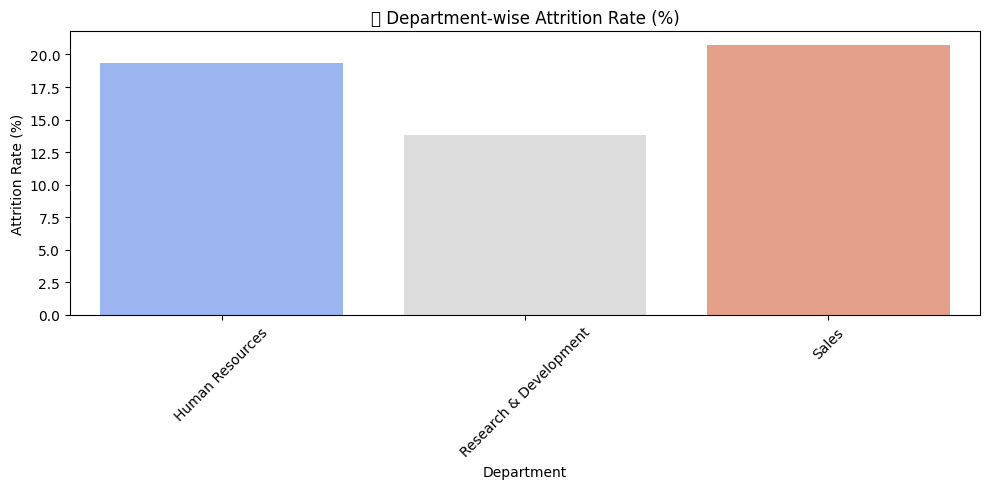

In [19]:
# Calculate department-wise attrition rate
dept_attrition_counts = df[df['Attrition'] == 'Yes']['Department'].value_counts()
dept_total_counts = df['Department'].value_counts()
dept_attrition_rate = (dept_attrition_counts / dept_total_counts * 100).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_attrition_rate.index, y=dept_attrition_rate.values, palette='coolwarm')

plt.title('📉 Department-wise Attrition Rate (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5.2 Salary Band vs Attrition

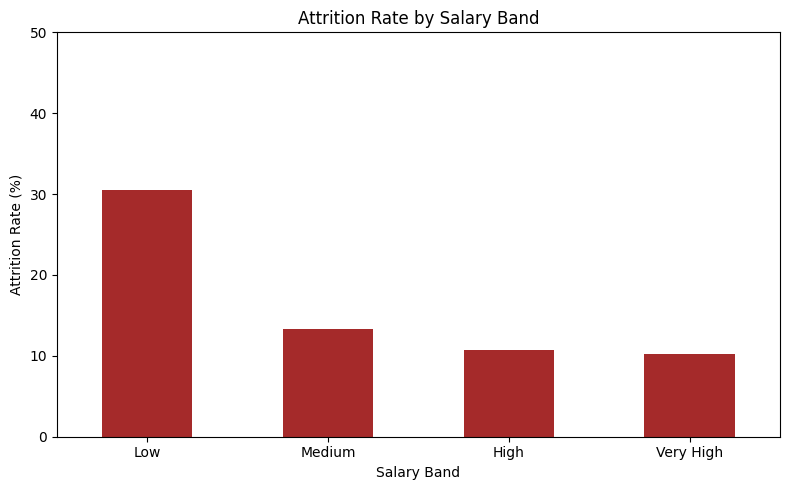

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create Salary Bands using MonthlyIncome quartiles
df['Salary Band'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

#: Calculate Attrition Rate by Salary Band
salary_attrition = pd.crosstab(df['Salary Band'], df['Attrition'], normalize='index') * 100

#  Plot the Attrition Rate for the 'Yes' category
salary_attrition['Yes'].plot(kind='bar', color='brown', figsize=(8, 5))

plt.title('Attrition Rate by Salary Band')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Salary Band')
plt.xticks(rotation=0)
plt.ylim(0, 50)  # Adjust based on what makes sense for your data
plt.tight_layout()
plt.show()

# Monthly Income vs Attrition

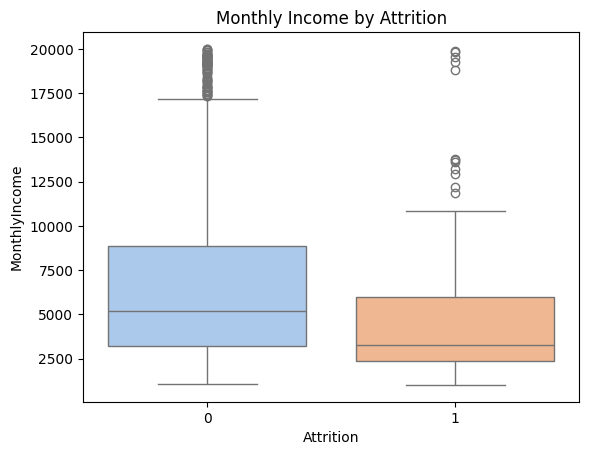

In [39]:

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')
plt.title("Monthly Income by Attrition")
plt.show()

# 5.3 Promotions (Years Since Last Promotion vs Attrition)

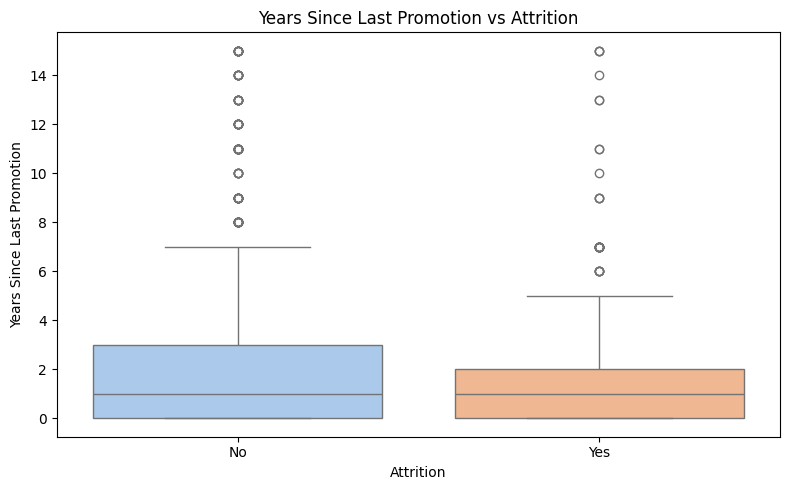

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, palette='pastel')

plt.title("Years Since Last Promotion vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years Since Last Promotion")
plt.tight_layout()
plt.show()

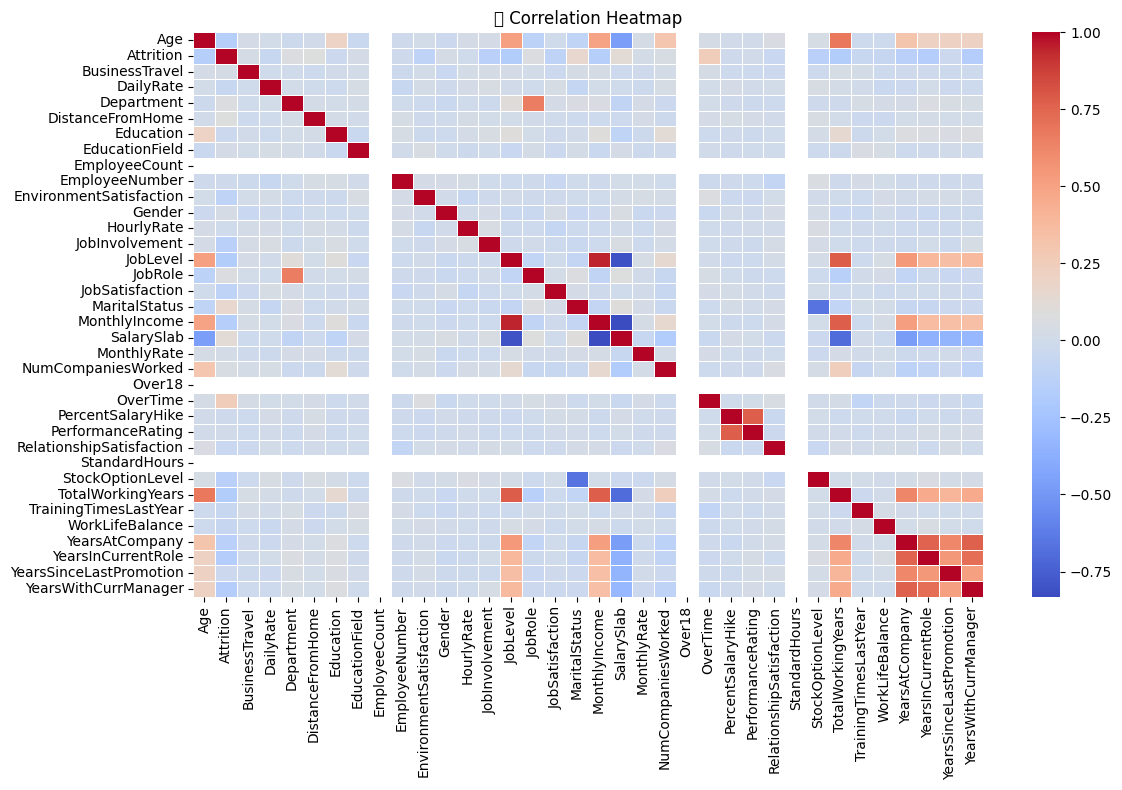

In [40]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("🔗 Correlation Heatmap")
plt.tight_layout()
plt.show()

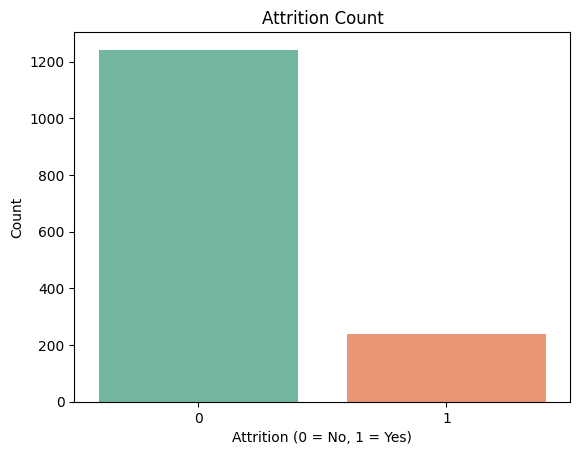

In [41]:
# Attrition distribution
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Attrition Count")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 6  classification model (Logistic Regression)

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv("HR_Analytics_emp_attrition.csv")

# Drop irrelevant columns
df.drop(['EmpID', 'AgeGroup'], axis=1, errors='ignore', inplace=True)

# Clean & encode target
df['Attrition'] = df['Attrition'].astype(str).str.strip().str.title().map({'Yes': 1, 'No': 0})

# Encode categorical features
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8817567567567568

📊 Confusion Matrix:
 [[242   6]
 [ 29  19]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.76      0.40      0.52        48

    accuracy                           0.88       296
   macro avg       0.83      0.69      0.73       296
weighted avg       0.87      0.88      0.87       296



# 6.1 Confusion Matrix and ROC Curve

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


In [37]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

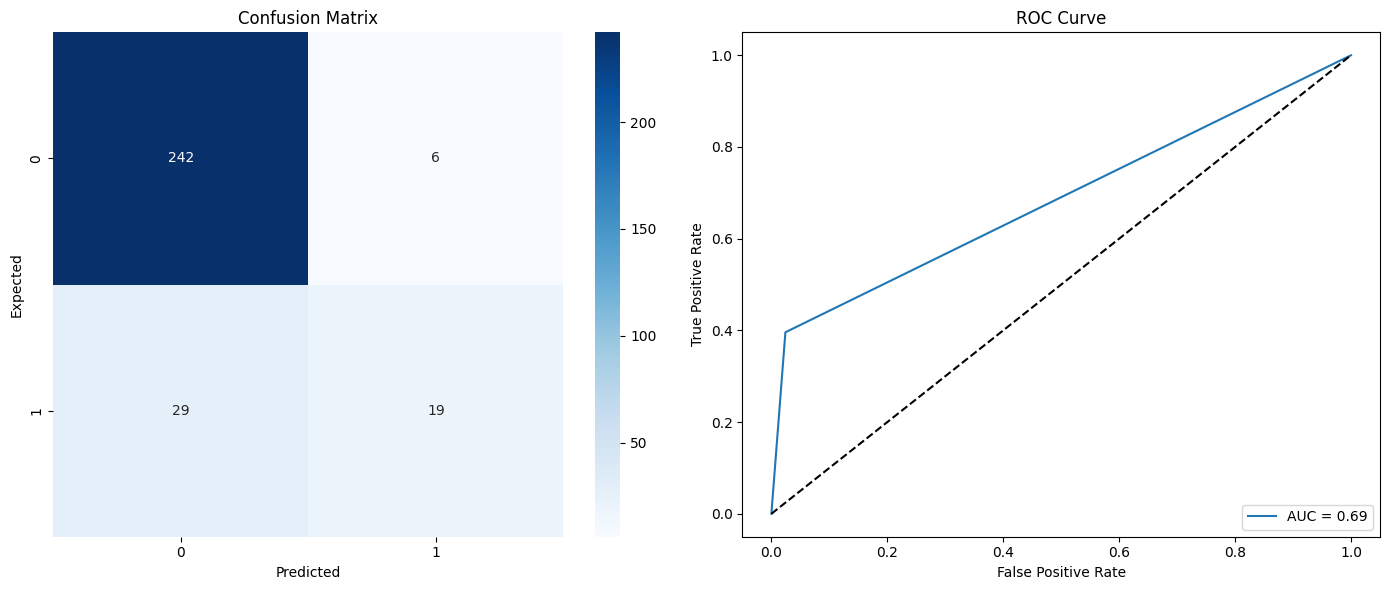

In [38]:
# Plot Confusion Matrix & ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Expected")

# ROC Curve
ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_title("ROC Curve")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [44]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [59]:
# Train decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
# Logistic Regression evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_pred = log_model.predict(X_test)
print("🔎 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Report:\n", classification_report(y_test, log_pred))

🔎 Logistic Regression:
Accuracy: 0.8817567567567568
Confusion Matrix:
 [[242   6]
 [ 29  19]]
Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.76      0.40      0.52        48

    accuracy                           0.88       296
   macro avg       0.83      0.69      0.73       296
weighted avg       0.87      0.88      0.87       296



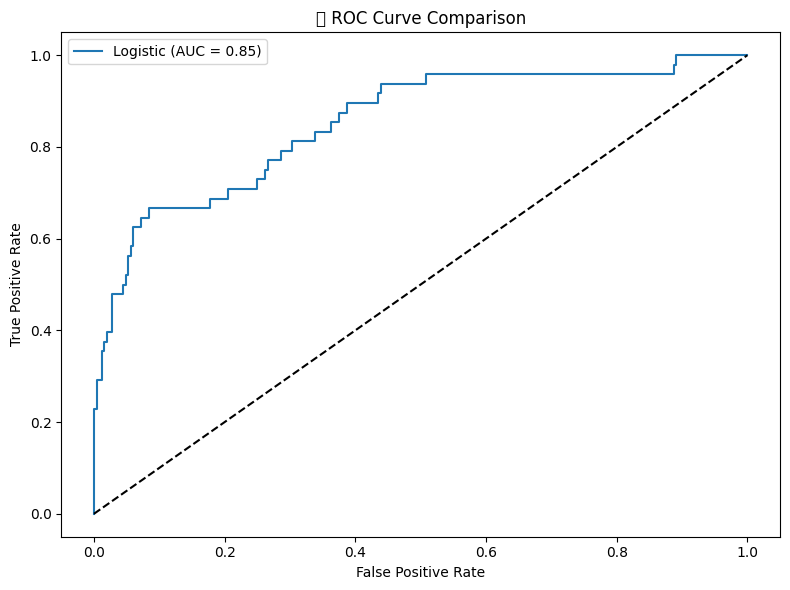

In [47]:
# ROC Curves for all models
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(8, 6))

for name, model in {
    'Logistic': log_model,

}.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("🚦 ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

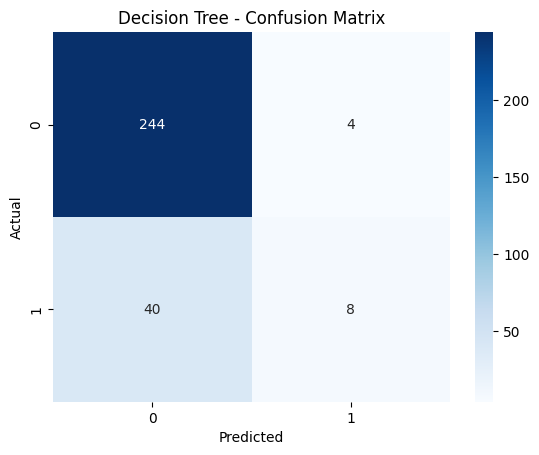

In [54]:
# Build and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

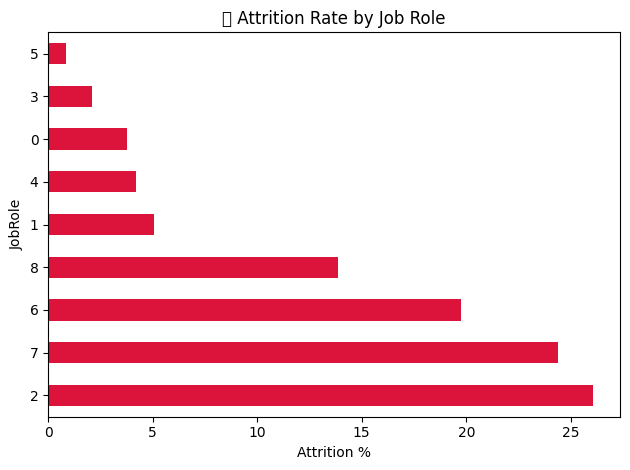

In [53]:
# Attrition by Job Role (Great for storytelling visuals)
attrition_by_role = df[df['Attrition'] == 1]['JobRole'].value_counts(normalize=True) * 100
attrition_by_role.plot(kind='barh', color='crimson')
plt.title("🔥 Attrition Rate by Job Role")
plt.xlabel("Attrition %")
plt.tight_layout()
plt.show()


# Classification report

In [55]:

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       248
           1       0.67      0.17      0.27        48

    accuracy                           0.85       296
   macro avg       0.76      0.58      0.59       296
weighted avg       0.83      0.85      0.81       296



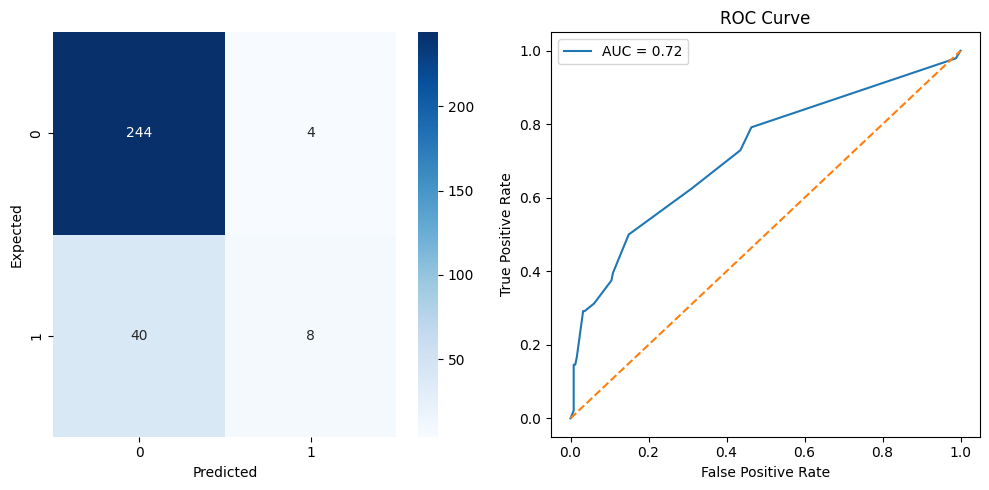

In [57]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Expected")

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [70]:

features = X.columns.tolist()

# Visualize the decision tree

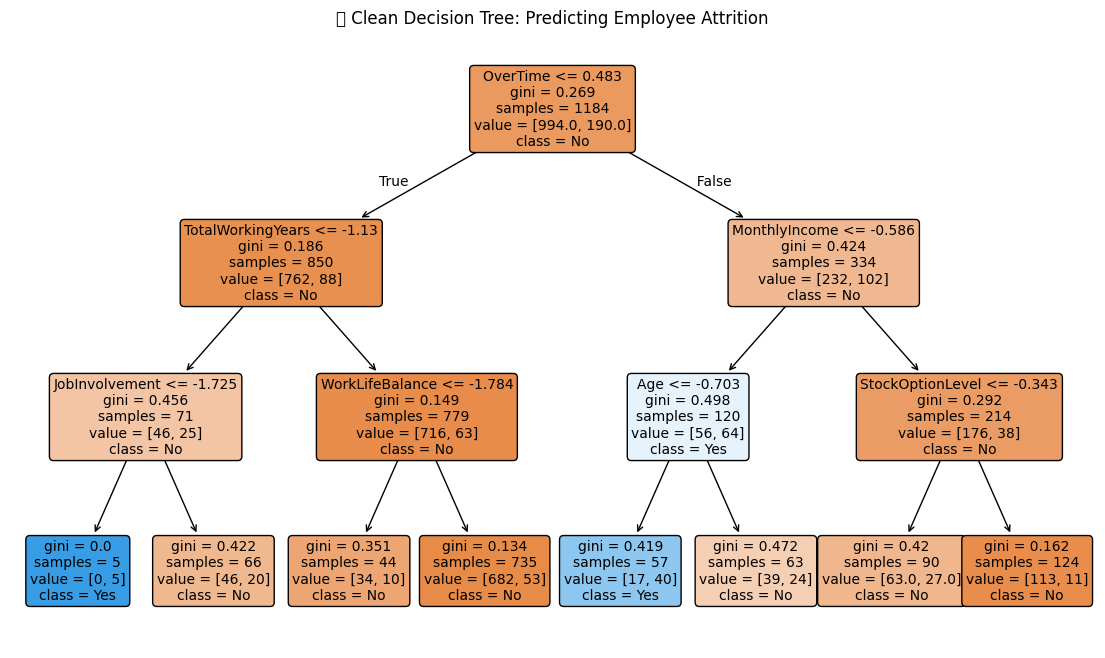

In [72]:
from sklearn.tree import plot_tree# 8 SHAP value analysis
import matplotlib.pyplot as plt

# Limit depth to make the tree readable
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Rewrap X if needed (in case it's a NumPy array)
X = pd.DataFrame(X, columns=features)  # 'features' should already be saved before transformation

# Plot minimal, meaningful tree
plt.figure(figsize=(14, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    max_depth=3,         # Limits visible depth
    fontsize=10
)
plt.title("🌳 Clean Decision Tree: Predicting Employee Attrition")
plt.show()

# 8 SHAP value analysis

In [80]:
!pip install shap
import shap

In [81]:
shap.initjs()

                     Feature  SHAP Value
15           JobSatisfaction    0.955891
14                   JobRole    0.566842
17             MonthlyIncome    0.444424
3             BusinessTravel    0.323388
6           DistanceFromHome    0.314072
9    EnvironmentSatisfaction    0.252897
19               MonthlyRate    0.155315
29            YearsAtCompany    0.090904
11                HourlyRate    0.069607
10                    Gender    0.059742
5                 Department    0.051110
26         TotalWorkingYears    0.036088
28           WorkLifeBalance    0.010745
23         PerformanceRating    0.000000
2                   AgeGroup    0.000000
22         PercentSalaryHike   -0.000385
18                SalarySlab   -0.003620
16             MaritalStatus   -0.008251
7                  Education   -0.045252
0                      EmpID   -0.045771
27     TrainingTimesLastYear   -0.055527
8             EducationField   -0.107684
4                  DailyRate   -0.140198
13              

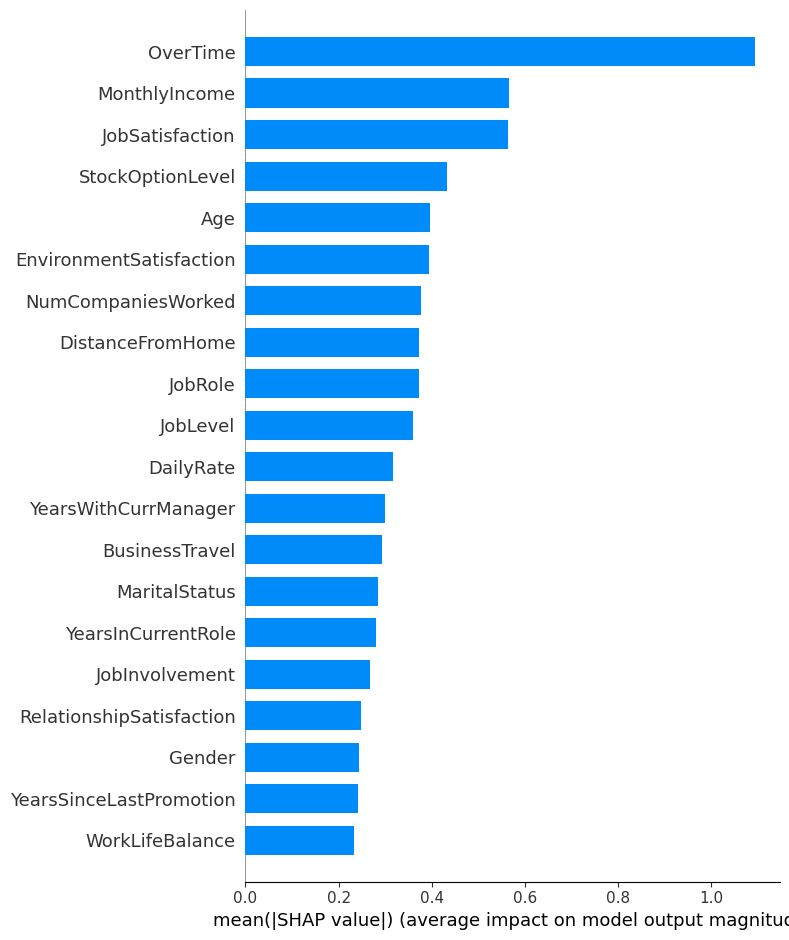

In [87]:

# 📥 Load dataset
data = pd.read_csv("HR_Analytics_emp_attrition.csv")

# 🧹 Drop irrelevant columns
cols_to_drop = ['emp no', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours', 'CF_attritionlabel']
data.drop(columns=cols_to_drop, errors='ignore', inplace=True)

# 🎯 Encode target
data['Attrition'] = data['Attrition'].astype(str).str.strip().str.title().map({'Yes': 1, 'No': 0})

# 🎛️ Split features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# 🔣 Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train XGBoost
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# 🔍 SHAP Explanation
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 🔎 Feature impact for 1st test sample
shap_df = pd.DataFrame({'Feature': X_test.columns, 'SHAP Value': shap_values[0]})
print(shap_df.sort_values(by='SHAP Value', ascending=False))

# 📈 Global SHAP summary (bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")



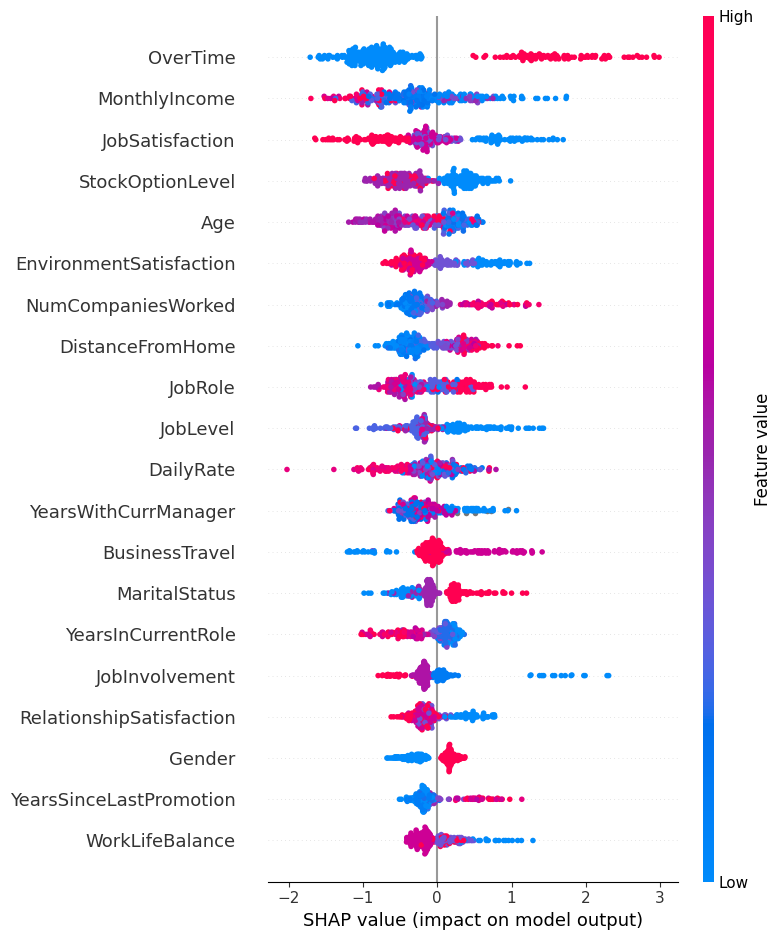

In [86]:
# Classic SHAP beeswarm plot
shap.summary_plot(shap_values, X_test)

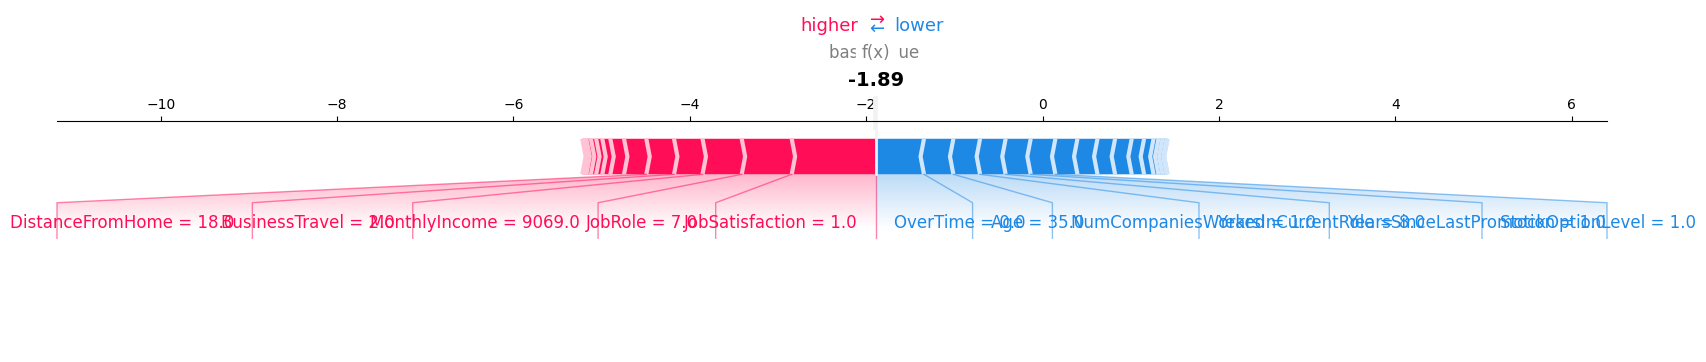

In [85]:

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)
plt.savefig('shap_force.png')
plt.close()